In [1]:
# 平方根轉換(square-root transformation)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\ProgramData\anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# create dataframe
df = pd.DataFrame()
# draw samples from a poisson distribution
df["counts1"] = stats.poisson.rvs(mu=3, size=10000)
df["counts2"] = stats.poisson.rvs(mu=2, size=10000)

# display top rows
df.head()

,counts1,counts2
0,6,4
1,2,5
2,8,2
3,1,0
4,2,2


In [4]:
df.shape

(10000, 2)

In [5]:
def diagnostic_plots(df, variable):

    # function to plot a bar plot and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].value_counts().sort_index().plot.bar()
    plt.title(f"Bar plot of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

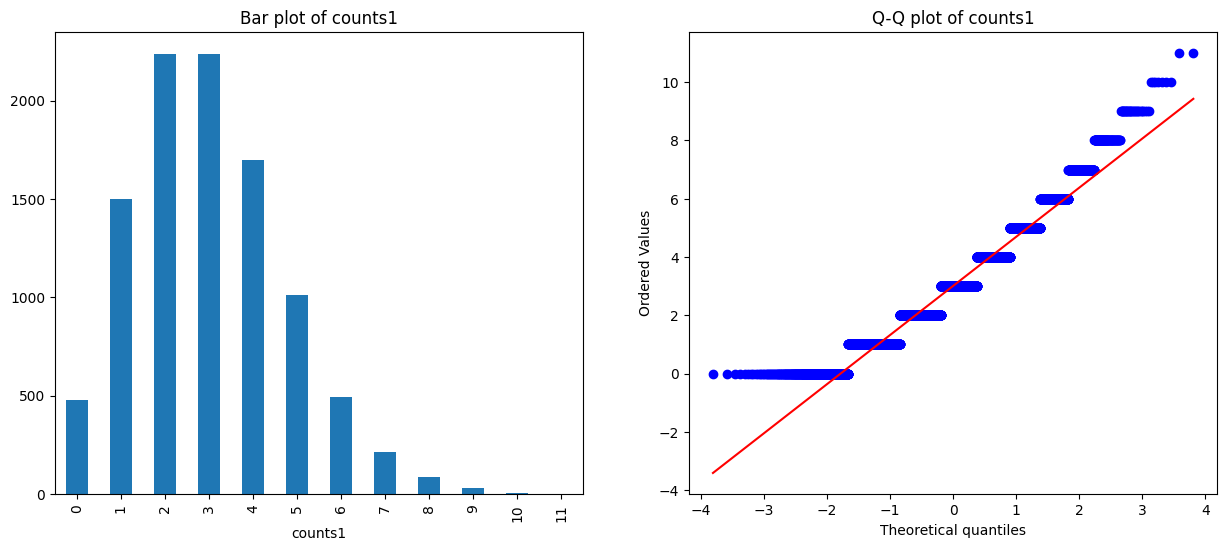

In [6]:
diagnostic_plots(df, "counts1")

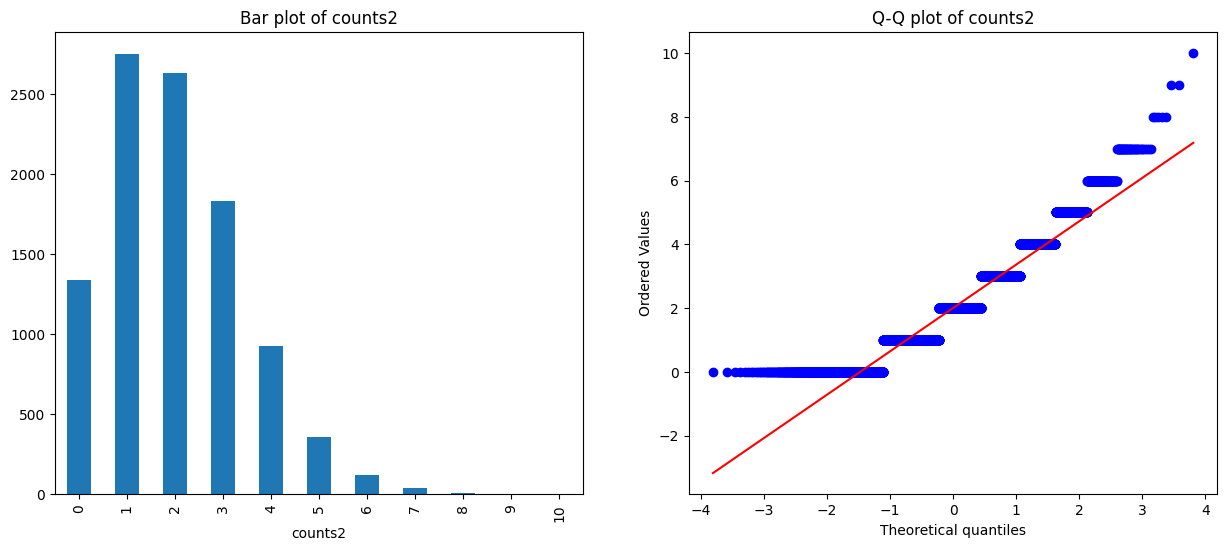

In [7]:
diagnostic_plots(df, "counts2")

In [8]:
# 使用Numpy進行平方根轉換
# make a copy of the dataframe

df_tf = df.copy()

In [9]:
# apply square root transformation

df_tf[["counts1", "counts2"]] = np.sqrt(df[["counts1", "counts2"]])

df_tf[["counts1", "counts2"]] = np.round(df_tf[["counts1", "counts2"]], 2)

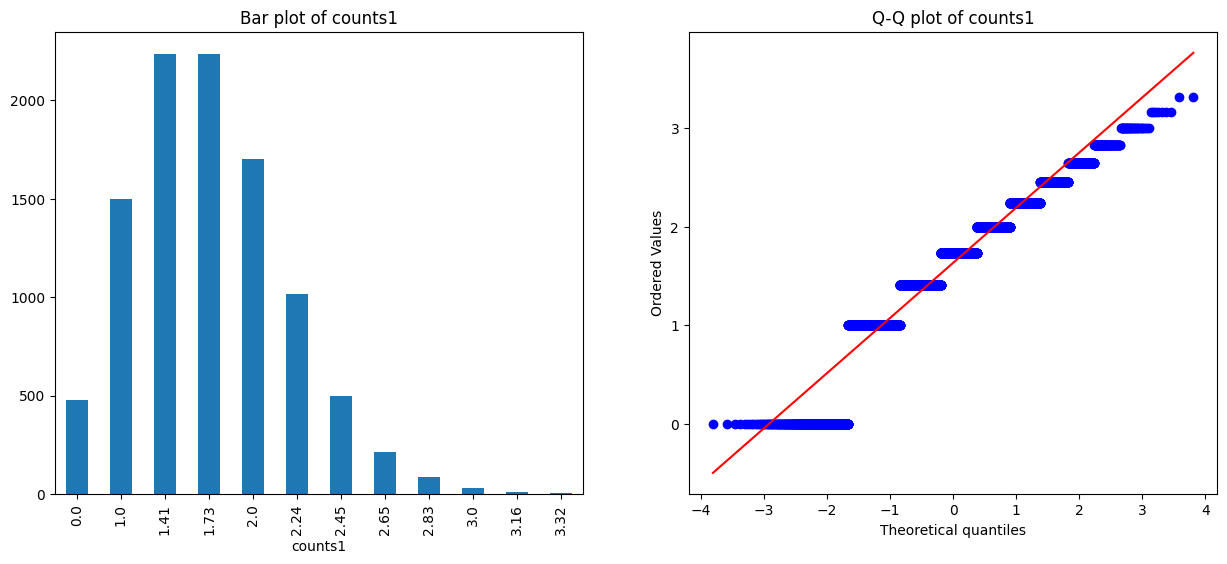

In [10]:
diagnostic_plots(df_tf, "counts1")

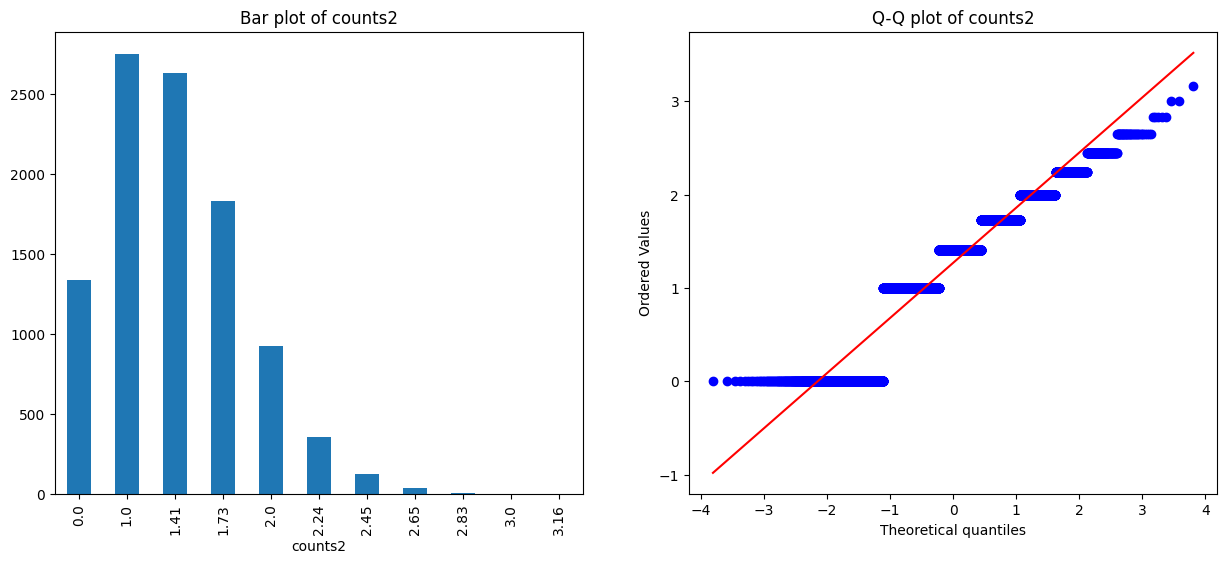

In [11]:
diagnostic_plots(df_tf, "counts2")

In [12]:
# 使用Scikit-learn進行平方根轉換
from sklearn.preprocessing import FunctionTransformer

In [13]:
# make a copy of the data

df_tf = df.copy()

In [14]:
# set up transformer with desired operations

transformer = FunctionTransformer(func=lambda x: np.round(np.sqrt(x), 2))

In [15]:
# transform slice of dataframe with variables to transform

df_tf = transformer.transform(df[["counts1", "counts2"]])

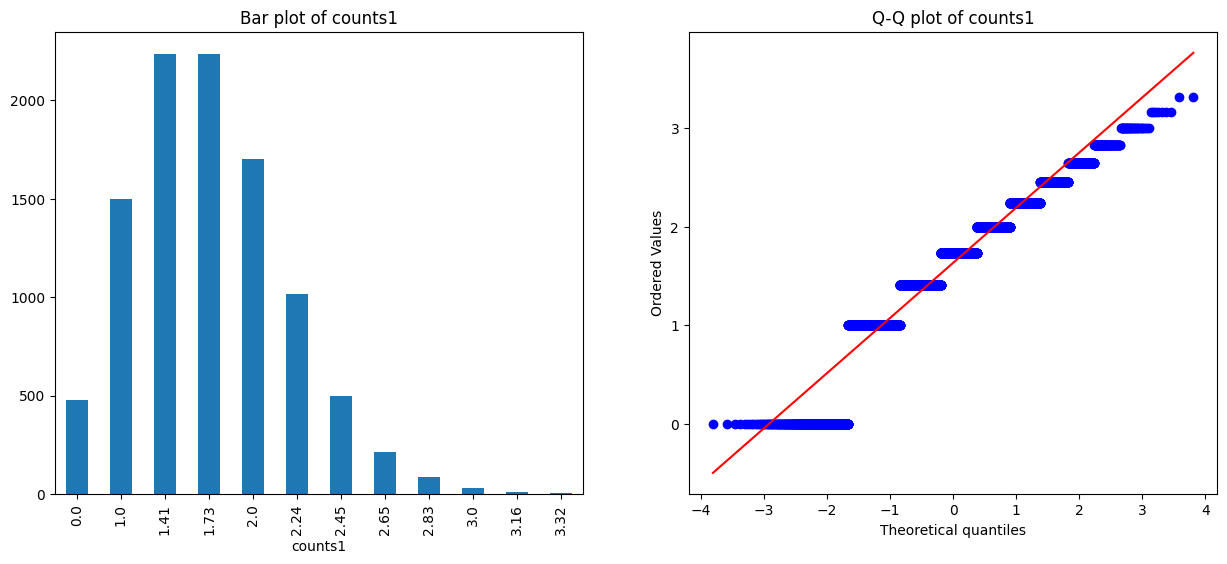

In [16]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts1")

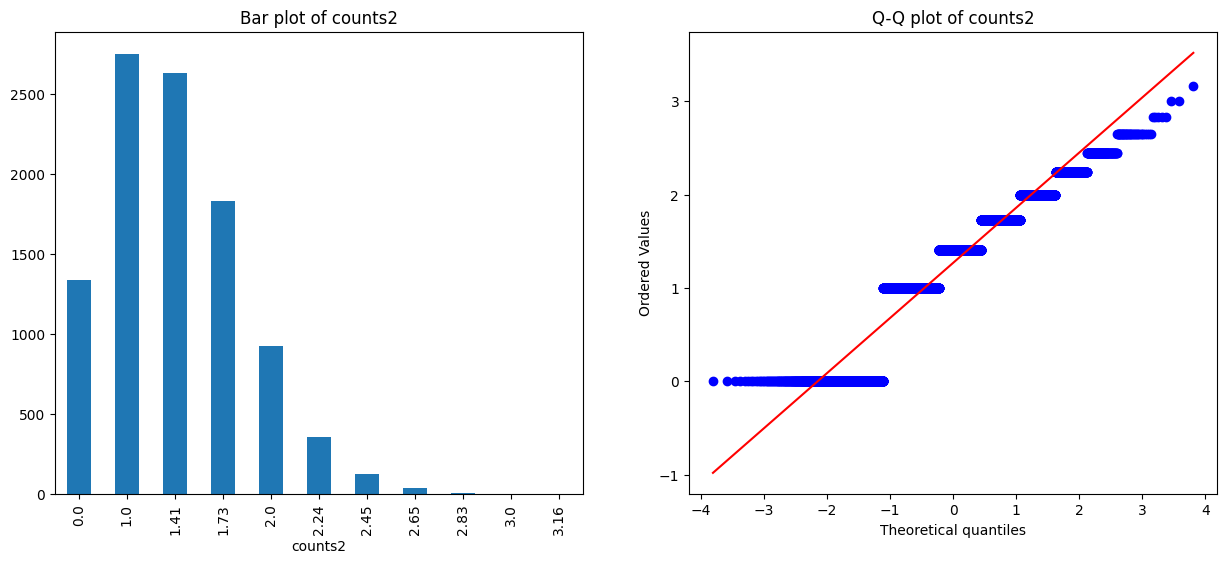

In [17]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts2")

In [18]:
# # 使用Feature engine進行平方根轉換
from feature_engine.transformation import PowerTransformer

In [19]:
# set up PowerTransformer with the square root

root_t = PowerTransformer(exp=1 / 2)

# fit transformer to data
root_t.fit(df)

# automatically finds numerical variables
root_t.variables_

['counts1', 'counts2']

In [20]:
# transform variables

df_tf = root_t.transform(df)

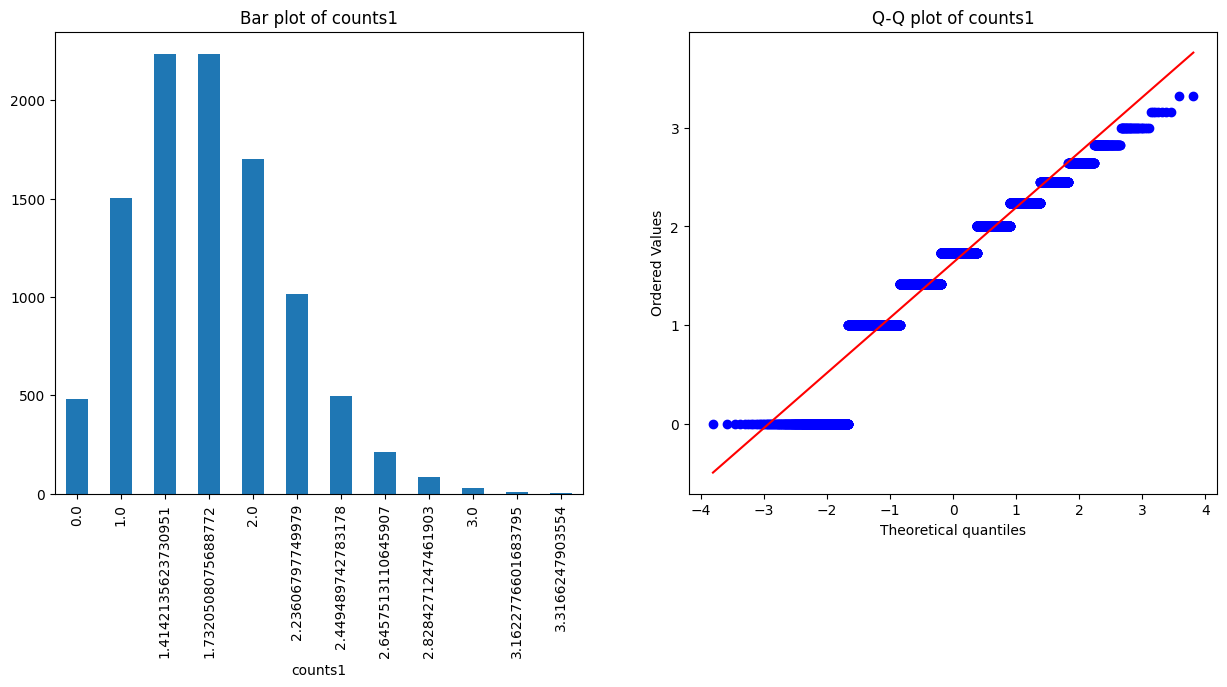

In [21]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts1")

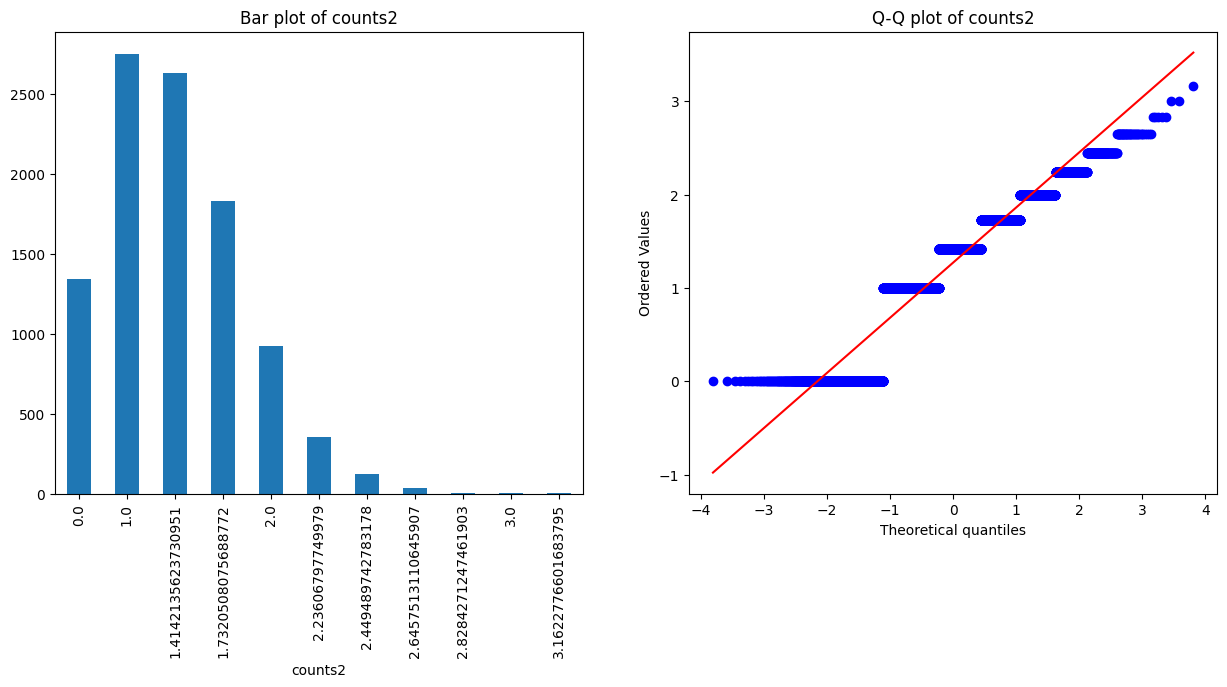

In [22]:
# check distribution of transformed variable

diagnostic_plots(df_tf, "counts2")